In [5]:
#Importing the Packages required
import numpy as np # for mathematical calculation
import pandas as pd # for importing and exporting / data manipulation
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualisation along with statistics

In [6]:
#Assigning file path
import os

In [7]:
#Choosing Working Directory
os.chdir('D:\\DS Project\\Ecommerce Analytics')

In [8]:
#Importing Dataset (Reading Excel Format)
rfm_df = pd.read_excel(r'E-com_Data.xlsx')

In [9]:
#Head to see the 1st 5 rows of our dataset
rfm_df.head(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,NaN,NaN,NaN


In [6]:
#Descriptive Statistics
rfm_df.describe(include='all')

<ipython-input-6-ce08303683f6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include='all')


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
count,404189.000000,537979,537979.000000,537979,537979.000000,537979,537979.000000,537979.000000,537979,8345.0,3,0.0
unique,NaN,4009,NaN,381,NaN,770,NaN,NaN,20,NaN,2,NaN
top,NaN,85123A,NaN,2017-11-18 00:00:00,NaN,15:56:00,NaN,NaN,Location 36,NaN,Missing,NaN
freq,NaN,2298,NaN,3195,NaN,2616,NaN,NaN,501963,NaN,2,NaN
first,NaN,NaN,NaN,2016-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2181.909035,NaN,385017.572063,NaN,9.343339,NaN,378.339062,2161.414593,NaN,1.0,NaN,NaN
std,1252.681881,NaN,13426.052649,NaN,27.623322,NaN,440.048823,4538.487177,NaN,0.0,NaN,NaN
min,2.000000,NaN,361429.000000,NaN,-2003.000000,NaN,1.000000,-10152.000000,NaN,1.0,NaN,NaN
25%,1207.000000,NaN,372961.000000,NaN,1.000000,NaN,169.000000,451.000000,NaN,1.0,NaN,NaN


In [7]:
# Checking cases where unit price less than 0
rfm_df[rfm_df['Price']<0]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
31,4325.0,14619,366771,2017-01-31,-1,11:07:00,179.0,-179.0,Location 1,1.0,NaN,NaN
121,4107.0,15364,364641,2016-12-21,-1,12:41:00,885.0,-885.0,Location 1,1.0,NaN,NaN
153,4043.0,85014B,387837,2017-08-10,-1,12:18:00,694.0,-694.0,Location 1,1.0,NaN,NaN
252,3951.0,14614,384727,2017-07-20,-1,13:33:00,943.0,-943.0,Location 1,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537866,3309.0,85194L,372168,2017-03-31,-8,11:02:00,122.0,-976.0,Location 8,1.0,NaN,NaN
537867,3309.0,85194L,372305,2017-03-28,-8,16:34:00,106.0,-848.0,Location 8,1.0,NaN,NaN
537898,1633.0,14693,393042,2017-09-24,-2,10:40:00,394.0,-788.0,Location 8,1.0,NaN,NaN
537900,1631.0,14693,380693,2017-06-08,-4,12:04:00,415.0,-1660.0,Location 8,1.0,NaN,NaN


In [8]:
# filtering rows on unit price greater than 0
rfm_df = rfm_df[rfm_df['Price']>=0]

In [9]:
#Rows and COlumn count of Dataframe
rfm_df.shape

(528476, 12)

In [10]:
#Function Use - to show the Variable Type 
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528476 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         396006 non-null  float64       
 1   Item Code          528476 non-null  object        
 2   InvoieNo           528476 non-null  int64         
 3   Date of purchase   528476 non-null  datetime64[ns]
 4   Quantity           528476 non-null  int64         
 5   Time               528476 non-null  object        
 6   price per Unit     528476 non-null  float64       
 7   Price              528476 non-null  float64       
 8   Shipping Location  528476 non-null  object        
 9   Cancelled_status   0 non-null       float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 52.4+ MB


In [11]:
# Applying Date Time Function to 'Date of Purchase Column'
rfm_df['Date of Purchase'] = pd.to_datetime(rfm_df['Date of purchase'])

In [12]:
#dropping columns less than 0 quantity
rfm_df = rfm_df[rfm_df['Quantity']>=0]

In [13]:
#Converting datatype to string
#Changing Customer ID from float format to Object format
rfm_df.loc[:,'CustomerID'] = rfm_df.loc[:,'CustomerID'].astype('object')

In [14]:
# Unique customerID count
rfm_df['CustomerID'].nunique()

4324

In [15]:
#Customer ID got changed from float to object
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528476 entries, 0 to 537978
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         396006 non-null  object        
 1   Item Code          528476 non-null  object        
 2   InvoieNo           528476 non-null  int64         
 3   Date of purchase   528476 non-null  datetime64[ns]
 4   Quantity           528476 non-null  int64         
 5   Time               528476 non-null  object        
 6   price per Unit     528476 non-null  float64       
 7   Price              528476 non-null  float64       
 8   Shipping Location  528476 non-null  object        
 9   Cancelled_status   0 non-null       float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Date of Purchase   528476 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), 

In [16]:
#range of transaction Data i.e Start and End Date
print(rfm_df['Date of Purchase'].min(),"to", rfm_df['Date of Purchase'].max())

2016-12-02 00:00:00 to 2017-12-19 00:00:00


In [17]:
#Missing Value Count in each variable columns
pd.DataFrame(rfm_df).isnull().sum()

CustomerID           132470
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     528476
Reason of return     528476
Sold as set          528476
Date of Purchase          0
dtype: int64

In [18]:
#Removing Blank Customer IDs
rfm_df = rfm_df[rfm_df['CustomerID'].isna()==False]

In [19]:
#Missing Value Count in each variable columns
pd.DataFrame(rfm_df).isnull().sum()

CustomerID                0
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     396006
Reason of return     396006
Sold as set          396006
Date of Purchase          0
dtype: int64

In [20]:
rfm_df.head(5)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date of Purchase
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [21]:
#extracting year and month from Date of Purchase (for Vizualisation Purpose)
rfm_df['year'] = rfm_df['Date of Purchase'].dt.year
rfm_df['month'] = rfm_df['Date of Purchase'].dt.month

In [22]:
#creating column year_month so that overlap of months amidst 2 years can be understood (for December Month)
rfm_df['year_month'] = rfm_df['year'].astype(str) + "_" + rfm_df['month'].astype(str)

In [23]:
rfm_df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date of Purchase,year,month,year_month
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29,2017,10,2017_10
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05,2017,10,2017_10
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12,2017,10,2017_10
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22,2017,8,2017_8
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10,2017,10,2017_10


In [24]:
# calculating no of days its been since purchase date from 2017-12-20 as benchmark
d1 = pd.to_datetime(20171220, format='%Y%m%d')
rfm_df['days_since'] = d1 - rfm_df['Date of Purchase']
rfm_df['days_since'] = rfm_df['days_since'].apply(lambda x: x.days)

## Exploratory Data Analysis

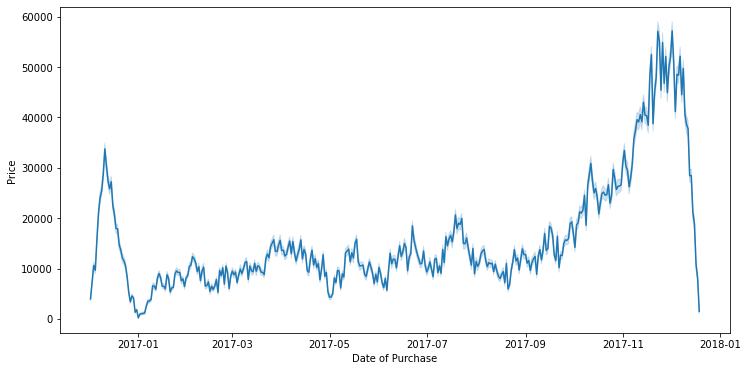

In [25]:
#Total Monetary values of sales achieved every month
#lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='Date of Purchase', y='Price', estimator='sum', data=rfm_df[rfm_df['Price']<=250])
plt.show()

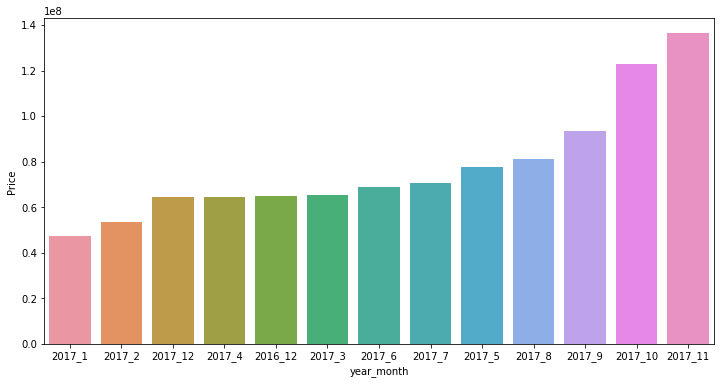

In [26]:
#Bar Graph
plt.figure(figsize=(12,6))
g1 = rfm_df.groupby('year_month')['Price'].sum().sort_values(ascending=True).reset_index()
sns.barplot(x='year_month', y='Price', data=g1)
plt.show()

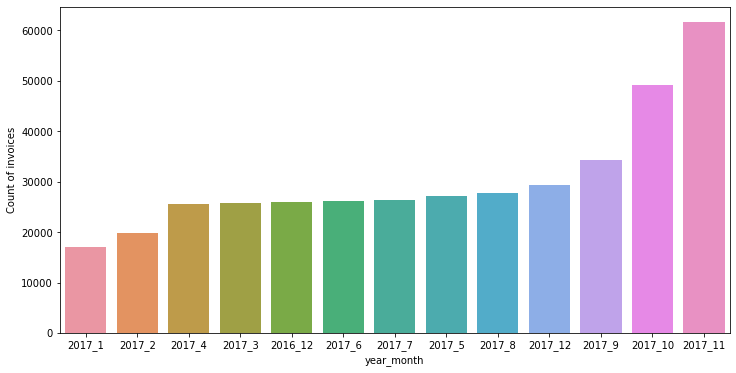

In [27]:
#Bar Graph representing the total count of invoices made in each month.
plt.figure(figsize=(12,6))
g = rfm_df.groupby('year_month')['InvoieNo'].count().sort_values(ascending=True).reset_index()
sns.barplot(x='year_month', y='InvoieNo', data=g)
plt.ylabel('Count of invoices')
plt.show()

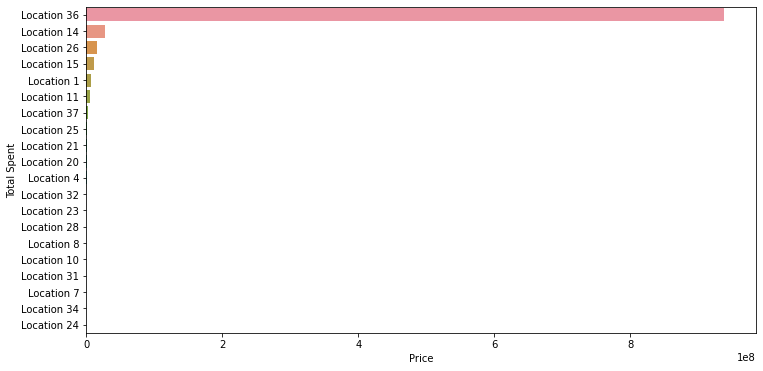

In [28]:
#Bar Graph showing the Loaction where most of the sale was done.
plt.figure(figsize=(12,6))
g = rfm_df.groupby('Shipping Location')['Price'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Price', y='Shipping Location', data=g)
plt.ylabel('Total Spent')
plt.show()

In [29]:
#Description Stats
rfm_df.describe()

,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Sold as set,year,month,days_since
count,396006.000000,396006.000000,396006.000000,396006.000000,0.0,0.0,396006.000000,396006.000000,396006.000000
mean,385683.539363,11.822546,338.625269,2554.896987,NaN,NaN,2016.934483,7.770094,157.053577
std,13107.531763,29.666734,424.300411,4903.384347,NaN,NaN,0.247436,3.417014,112.870840
min,361429.000000,1.000000,2.000000,12.000000,NaN,NaN,2016.000000,1.000000,1.000000
25%,374298.000000,2.000000,157.000000,598.000000,NaN,NaN,2017.000000,5.000000,55.000000
50%,386957.000000,6.000000,237.000000,1608.000000,NaN,NaN,2017.000000,9.000000,137.000000
75%,397157.000000,12.000000,403.000000,2520.000000,NaN,NaN,2017.000000,11.000000,252.000000
max,406651.000000,3186.000000,64973.000000,90400.000000,NaN,NaN,2017.000000,12.000000,383.000000


In [30]:
#keep relevant columns and drop duplicates
df = rfm_df[['CustomerID', 'InvoieNo']].drop_duplicates()

## RFM Cacluation

In [31]:
#Using Aggregator Function to create Recency,Frequency and Monetary Values and to group the variables by Customer ID
agg = {
       'recency': ('days_since','min'),
       'frequency': ('InvoieNo', 'count'),
       'monetary': ('Price', 'mean')
      }
rfm_main = rfm_df.groupby('CustomerID').agg(**agg)

In [32]:
rfm_main.head()

,recency,frequency,monetary
CustomerID,,,
2.0,4,182,3042.329670
3.0,77,27,9533.481481
4.0,19,72,2452.958333
5.0,311,16,2623.500000
6.0,37,77,2168.467532


In [33]:
#Example to find the RFM of the Customer ID 4355
rfm_main.loc[4355,:]

recency        44.000000
frequency      21.000000
monetary     1867.095238
Name: 4355.0, dtype: float64

In [34]:
rfm_df[rfm_df['CustomerID']==4355]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date of Purchase,year,month,year_month,days_since
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29,2017,10,2017_10,52
35952,4355,14910,390525,2017-09-15,1,09:34:00,1020.0,1020.0,Location 36,NaN,NaN,NaN,2017-09-15,2017,9,2017_9,96
35953,4355,14988,390525,2017-09-08,12,09:34:00,86.0,1032.0,Location 36,NaN,NaN,NaN,2017-09-08,2017,9,2017_9,103
35954,4355,14989,390525,2017-09-07,12,09:34:00,116.0,1392.0,Location 36,NaN,NaN,NaN,2017-09-07,2017,9,2017_9,104
35955,4355,15721,390525,2017-09-08,3,09:34:00,497.0,1491.0,Location 36,NaN,NaN,NaN,2017-09-08,2017,9,2017_9,103
35956,4355,15174,390525,2017-09-09,4,09:34:00,391.0,1564.0,Location 36,NaN,NaN,NaN,2017-09-09,2017,9,2017_9,102
35957,4355,14991,390525,2017-09-10,4,09:34:00,400.0,1600.0,Location 36,NaN,NaN,NaN,2017-09-10,2017,9,2017_9,101
35958,4355,14993,390525,2017-09-09,4,09:34:00,403.0,1612.0,Location 36,NaN,NaN,NaN,2017-09-09,2017,9,2017_9,102
35959,4355,15363,398177,2017-11-06,4,15:36:00,430.0,1720.0,Location 36,NaN,NaN,NaN,2017-11-06,2017,11,2017_11,44
35960,4355,14991,398177,2017-11-02,4,15:36:00,433.0,1732.0,Location 36,NaN,NaN,NaN,2017-11-02,2017,11,2017_11,48


In [35]:
#Descriptive Statistics of rfm_main
rfm_main.describe()

,recency,frequency,monetary
count,4324.000000,4324.000000,4324.000000
mean,93.755319,91.583256,3603.560144
std,100.115549,228.626074,5761.796848
min,1.000000,1.000000,194.000000
25%,19.000000,17.000000,1644.387104
50%,52.000000,41.000000,2278.700341
75%,143.250000,100.000000,3141.281562
max,381.000000,7838.000000,68310.000000


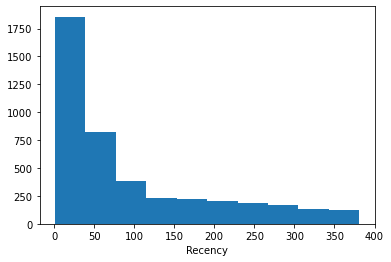

In [36]:
#Histogram Showing the Recency Days and their Customer count
fig, ax=plt.subplots()
ax.hist(rfm_main['recency'])
ax.set_xlabel('Recency')
plt.show()

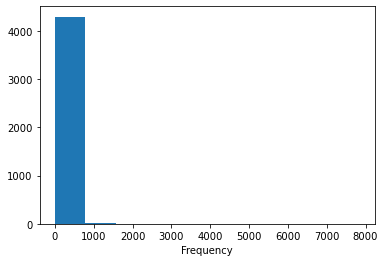

In [37]:
#Histogram showing the Frequency and their customers count
fig, ax=plt.subplots()
ax.hist(rfm_main['frequency'])
ax.set_xlabel('Frequency')
plt.show()

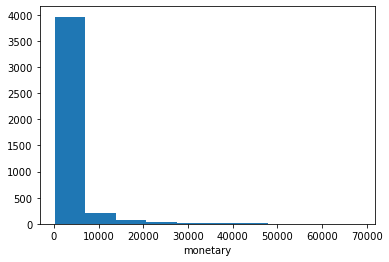

In [38]:
#Histogram Showing the Monetary Values and their customer count
fig, ax=plt.subplots()
ax.hist(rfm_main['monetary'])
ax.set_xlabel('monetary')
plt.show()

## Unsupervised Machine Learning

In [39]:
#Importing Unsupervised Machine Learning Packages
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the 
#individual features do not more or less look like standard normally distributed data.
scaler = StandardScaler()
scaled_RFM = scaler.fit_transform(rfm_main)

In [41]:
#Giving numerical values for the clusters and random state
kmeans = KMeans(n_clusters=200, random_state=123)
kmeans.fit(scaled_RFM)

KMeans(n_clusters=200, random_state=123)

In [42]:
#Labelling the kmeans model
rfm_main['kmeans_clusters'] = kmeans.labels_

In [43]:
#Clustering into 200 Clusters
clusters, count = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((clusters, count)))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
  162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  198 199]
 [ 34  47   4   1  13  10  17  87   6   1  10   5   8   2  26   1   1  24
   50  53   6   3  53   6   8   1  35   1  30   2  35   2   4   1   3  61
   23  23   4   9   4  13  

In [44]:
# Creating columns Recency,Frequency and Amount in Data Frame "Cluster_att"
cluster_att = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Amount'],
                           index=np.unique(kmeans.labels_))

cluster_att.head()

,Recency,Frequency,Amount
0,-0.308115,0.060106,-0.499817
1,2.180605,-0.314627,-0.266914
2,-0.147400,-0.375474,5.998368
3,-0.916600,24.420060,-0.070310
4,-0.839757,2.704230,-0.487194


In [45]:
# Count of rows and columns in Cluster_att
cluster_att.shape

(200, 3)

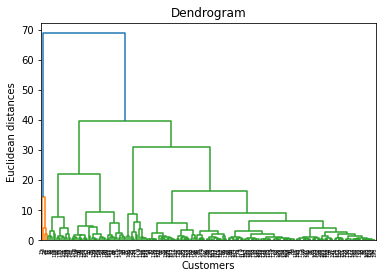

In [46]:
#plotting dendrogram to understand viable number of segments
dendrogram = sch.dendrogram(sch.linkage(cluster_att, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Cutting below 20 gives us 6 Clusters

In [47]:
#Hierarchical clustering using 6 clusters
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(cluster_att)

array([1, 5, 2, 0, 1, 1, 1, 1, 2, 3, 1, 2, 5, 4, 5, 0, 3, 1, 1, 1, 2, 4,
       1, 3, 2, 0, 1, 3, 1, 5, 5, 4, 4, 2, 2, 1, 1, 5, 4, 2, 2, 2, 5, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 5, 1, 2, 5,
       1, 1, 1, 2, 5, 0, 5, 1, 3, 1, 4, 5, 4, 1, 1, 1, 1, 1, 5, 2, 1, 2,
       1, 3, 1, 5, 4, 1, 1, 1, 2, 1, 5, 2, 1, 4, 5, 1, 1, 1, 3, 1, 1, 2,
       1, 1, 3, 1, 1, 2, 1, 5, 2, 4, 1, 1, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 4, 5, 5, 3, 1, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 5, 1, 1, 1, 5, 5,
       2, 1, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 1, 1, 1, 5,
       1, 1, 1, 5, 1, 5, 2, 1, 3, 1, 1, 2, 3, 1, 1, 1, 5, 5, 4, 1, 2, 1,
       1, 1], dtype=int64)

In [48]:
# Labelling the Variables
cluster_att['labels_final'] = cluster.labels_

In [49]:
#Adding Index Column
cluster_att = cluster_att.reset_index()

In [50]:
rfm_main.head()

,recency,frequency,monetary,kmeans_clusters
CustomerID,,,,
2.0,4,182,3042.329670,139
3.0,77,27,9533.481481,123
4.0,19,72,2452.958333,7
5.0,311,16,2623.500000,1
6.0,37,77,2168.467532,128


In [51]:
cluster_att.head()

,index,Recency,Frequency,Amount,labels_final
0,0,-0.308115,0.060106,-0.499817,1
1,1,2.180605,-0.314627,-0.266914,5
2,2,-0.147400,-0.375474,5.998368,2
3,3,-0.916600,24.420060,-0.070310,0
4,4,-0.839757,2.704230,-0.487194,1


In [52]:
#Merging rfm_main and cluster_att(Adding index and labels_final columns to rfm_main)
rfm_main = rfm_main.merge(cluster_att[['index','labels_final']], left_on='kmeans_clusters', right_on='index')

In [53]:
rfm_main.head()

,recency,frequency,monetary,kmeans_clusters,index,labels_final
0,4,182,3042.329670,139,139,1
1,3,184,3078.820652,139,139,1
2,4,199,2475.336683,139,139,1
3,2,180,3701.666667,139,139,1
4,12,187,3291.572193,139,139,1


In [54]:
#rfm_main columns
rfm_main.columns

Index(['recency', 'frequency', 'monetary', 'kmeans_clusters', 'index',
       'labels_final'],
      dtype='object')

In [55]:
#Removing unwanted columns
rfm_main.drop(['kmeans_clusters','index'], axis=1, inplace=True)

In [56]:
# Filling the labels_final column with the value '4'
rfm_main[rfm_main['labels_final']==4]

,recency,frequency,monetary,labels_final
3101,25,1,66584.000000,4
3102,79,3,68310.000000,4
3441,173,6,44632.000000,4
3442,183,2,47966.500000,4
3443,148,1,43632.000000,4
3798,185,2,66300.000000,4
3799,181,1,61600.000000,4
3808,22,69,46725.246377,4
3809,33,5,49095.200000,4
3810,12,30,48273.600000,4


# Attempting clustering with just k-means with 6 clusters

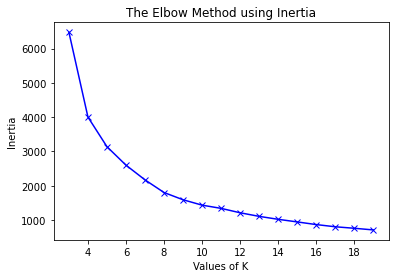

In [57]:
#verifying above approach for adequate cluster count just using k-means
inertia = []
for i in range(3,20):
    k = KMeans(n_clusters=i).fit(scaled_RFM)
    inertia.append(k.inertia_)

plt.plot(range(3,20), inertia, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [58]:
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(scaled_RFM)
rfm_main['kmeans_only'] = kmeans.labels_

## Final Cluster counts

## K-Means with 6 Clusters Results

In [59]:
# No.of customers grouped into each cluster
rfm_main.kmeans_only.value_counts()

0    2859
5    1006
3     217
1     177
2      61
4       4
Name: kmeans_only, dtype: int64

In [60]:
# Each cluster's Mean value of recency,frequency and monetary values
rfm_main.groupby('kmeans_only')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
kmeans_only,,,
0,94.332634,90.548094,3654.072824
1,97.242938,80.632768,3184.495568
2,99.967213,203.229508,3970.862022
3,94.714286,86.244240,2918.741728
4,104.750000,37.000000,2057.701236
5,90.873757,91.050696,3665.331808


## Hierarchical Clustering Results

In [61]:
# No.of customers grouped into each cluster
rfm_main['labels_final'].value_counts()

1    3479
5     598
2     183
4      36
3      24
0       4
Name: labels_final, dtype: int64

In [62]:
#behavioural traits of people in different clusters for 2 stage clustering
rfm_main.groupby('labels_final').mean()

,recency,frequency,monetary,kmeans_only
labels_final,,,,
0,2.500000,5796.750000,1512.081458,0.500000
1,59.909169,91.379994,2469.397204,1.406726
2,80.579235,47.808743,18392.068588,1.273224
3,8.083333,1321.083333,2895.959467,2.041667
4,143.055556,10.944444,48019.222557,1.277778
5,295.775920,23.510033,3044.764670,1.290970


## Observations :

## 1. Hierarchical clustering is doing a good job in finding clusters with varying attributes for customers, however the cluster sizes are imbalanced.

## 2. K-means clustering is also doing a good job in finding varying clusters of customers, with balanced cluster sizes as well.

## 3. DBSCAN performance is well becasue its ignoring the outliers and finding the homogenous groups, but is extremely imbalanced.

# Visualisation of the clusters by reducing dimensions from 3 to 2 using t-sne

In [63]:
from sklearn.manifold import TSNE

In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(rfm_main)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4324 samples in 0.013s...
[t-SNE] Computed neighbors for 4324 samples in 0.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4324
[t-SNE] Computed conditional probabilities for sample 2000 / 4324
[t-SNE] Computed conditional probabilities for sample 3000 / 4324
[t-SNE] Computed conditional probabilities for sample 4000 / 4324
[t-SNE] Computed conditional probabilities for sample 4324 / 4324
[t-SNE] Mean sigma: 14.796815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.628960
[t-SNE] KL divergence after 300 iterations: 1.270076


Text(0.5, 1.0, 'Clusters for Hirearchial clustering')

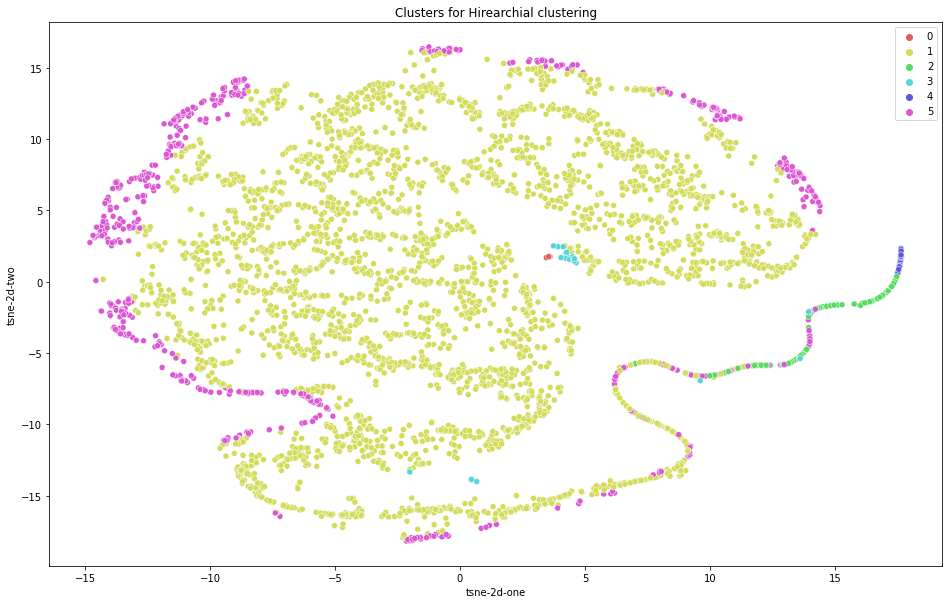

In [65]:
rfm_main['tsne-2d-one'] = tsne_results[:,0]
rfm_main['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=rfm_main.labels_final.tolist(),
                palette=sns.color_palette("hls", 6), legend='full', data=rfm_main)
plt.title("Clusters for Hirearchial clustering")

Text(0.5, 1.0, 'Clusters formed from K-Means clustering')

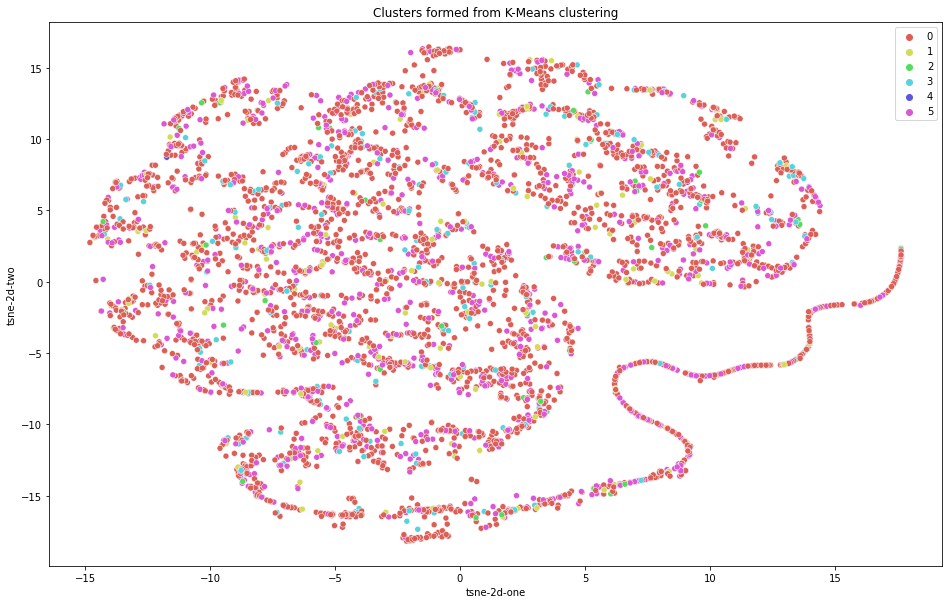

In [66]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=rfm_main.kmeans_only.tolist(),
                palette=sns.color_palette("hls", 6), legend='full', data=rfm_main)
plt.title("Clusters formed from K-Means clustering")

In [67]:
rfm_main.head(2)

,recency,frequency,monetary,labels_final,kmeans_only,tsne-2d-one,tsne-2d-two
0,4,182,3042.329670,1,0,1.180372,-11.753356
1,3,184,3078.820652,1,1,0.787120,-11.834014


In [68]:
# Grouping Hirearchial Cluster No and RFM Columns and showing their mean value
rfm_main.groupby('labels_final')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
labels_final,,,
0,2.500000,5796.750000,1512.081458
1,59.909169,91.379994,2469.397204
2,80.579235,47.808743,18392.068588
3,8.083333,1321.083333,2895.959467
4,143.055556,10.944444,48019.222557
5,295.775920,23.510033,3044.764670


## Inferences from Hirearchial Clustering
## Cluster'0' contains Customers with the "RFM Score of - 661" i.e Customers who have purchased recently and frequently but for low Monetary Values
## Cluster'1' contains Customers with the "RFM Score of - 442" i.e Customers who have purchased 2 months ago and who purchasesfrequently also for average Monetary Values
## Cluster'2' contains Customers with the "RFM Score of - 335" i.e Customers who have purchased 3 months ago and who purchases on repeated ocassions but for High Monetary Values.
## Cluster'3' contains Customers with the "RFM Score of - 553" i.e Customers who have purchased recently and frequently but for average Monetary Values.
## Cluster'4' contains Customers with the "RFM Score of - 216" i.e Customers who have purchased 5 months ago and who rarely purchases but for the Most Higher Monetary Values.
## Cluster'5' contains Customers with the "RFM Score of - 124" i.e Customers who have purchased 9 months ago and who rarely purchases with more than average Monetary Values

## Promising Customers - Cluster 0
## Potential Loyalist - Cluster 1
## Can't Lose Customers - Cluster 2
## Loyal Customers - Cluster 3
## About to Sleep Customers - Cluster 4
## At Risk Customers - Cluster 5

In [69]:
# Grouping Kmeans Cluster No and RFM Columns and showing their mean value
rfm_main.groupby('kmeans_only')[['recency','frequency','monetary']].mean()

,recency,frequency,monetary
kmeans_only,,,
0,94.332634,90.548094,3654.072824
1,97.242938,80.632768,3184.495568
2,99.967213,203.229508,3970.862022
3,94.714286,86.244240,2918.741728
4,104.750000,37.000000,2057.701236
5,90.873757,91.050696,3665.331808


## Inferences from KMeans Clustering
## Cluster'0' contains Customers with the "RFM Score of - 544" i.e Customers who have purchased recently and with average frequency and Monetary Values.
## Cluster'1' contains Customers with the "RFM Score of - 323" i.e Customers who have purchased not so long ago and who purchases less frequently also for average Monetary Values
## Cluster'2' contains Customers with the "RFM Score of - 266" i.e Customers who have purchased not so long ago and who purchases very frequently and also for Very High Monetary Values.
## Cluster'3' contains Customers with the "RFM Score of - 432" i.e Customers who have purchased recently and purchases on Average Ocassions but for Low Monetary Values.
## Cluster'4' contains Customers with the "RFM Score of - 111" i.e Customers who have purchased very long ago and who rarely purchases and for very Low Monetary Values.
## Cluster'5' contains Customers with the "RFM Score of - 655" i.e Customers who have purchased very Recently and with High Frequency and Monetary Values.

## Champion Customers - Cluster 5
## Loyal Customers - Cluster 0
## Promising Customers - Cluster 3
## Customers Needing Attention - Cluster 1
## At Risk - Cluster 2
## Worst Customers - Cluster 4

In [70]:
#Segmentation of Unique Customer IDs are done by both Kmeans Clustering and Hirearchial Clustering with the Parameter as RFM. 
print(rfm_main.labels_final.value_counts())
print(rfm_main.kmeans_only.value_counts())

1    3479
5     598
2     183
4      36
3      24
0       4
Name: labels_final, dtype: int64
0    2859
5    1006
3     217
1     177
2      61
4       4
Name: kmeans_only, dtype: int64
